In [149]:
import os, os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [151]:
## Encodes the labels in one hot format
def toOneHot(X):
    
    z = np.max(X) + 1
    X_oh = np.eye(z)[X]

    return X_oh

In [152]:
# Load and label EMG files
def loadAndLabel(folder_path,w,p):

    # folder_path -> path of the folder that contains each subject subfolder
    # w -> window size
    # p -> moving average delays

    data = [name for name in os.walk(folder_path)]

    X = []
    Y = []

    # Iterates folders
    for i in range(1,len(data)):

        # Iterates files in each folder
        for j in range(0,len(data[i][2])):

            # loads EMG data
            emgData = pd.read_csv(data[i][0] + '\\' + data[i][2][j], sep='\t', header=None).values

            # Performs segmentation in windows
            for k in range(0,emgData.shape[0] - w + 1,w):

                d = emgData[k:k+w,:]
                d = np.abs(d) # Absolute value of the EMG data
                # Moving average filter for each channel
                for n in range(d.shape[1]-1):
                    d[:,n] = np.convolve(d[:,n], np.ones(p)/p, mode='same')
                X.append(d)

                # Generate labels for each window
                if data[i][2][j].split(".")[0] == '0':
                    Y.append(0)
                elif data[i][2][j].split(".")[0] == '1':
                    Y.append(1)
                elif data[i][2][j].split(".")[0] == '2':
                    Y.append(2)
                elif data[i][2][j].split(".")[0] == '3':
                    Y.append(3)
                elif data[i][2][j].split(".")[0] == '4':
                    Y.append(4)

    X = np.array(X)
    X = X/np.max(X)
    Y = np.array(Y)
    Y = toOneHot(Y)

    return X, Y

In [153]:
path = "D:\Documentos\Datasets\EMG hand gestures dataset" # Write path of root folder
X, Y = loadAndLabel(path,200,20) # Load and label EMG data

In [154]:
print(X.shape)
print(Y.shape)

(4095, 200, 4)
(4095, 5)


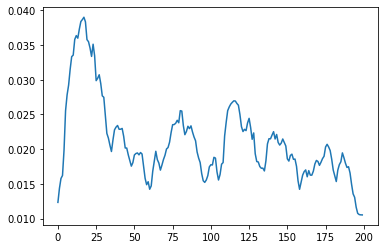

In [155]:
# Plots one window of data
plt.plot(X[100,:,0])

In [156]:
# Split intro training and validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [157]:
# Define model
model = Sequential()
model.add(Dense(32,activation='tanh'))
model.add(LSTM(16))
model.add(Dense(32,activation='tanh'))
model.add(Dense(5,activation='softmax'))

In [158]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])

In [159]:
history = model.fit(X_train,Y_train,batch_size=256,epochs=1000,validation_data=[X_test,Y_test])

Epoch 1/1000
13/13 [==============================] - 2s 62ms/step - loss: 1.6069 - acc: 0.2302 - val_loss: 1.5995 - val_acc: 0.3028
Epoch 2/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.5919 - acc: 0.2985 - val_loss: 1.5750 - val_acc: 0.2637
Epoch 3/1000
13/13 [==============================] - 0s 20ms/step - loss: 1.5412 - acc: 0.4127 - val_loss: 1.4521 - val_acc: 0.4042
Epoch 4/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.3328 - acc: 0.4005 - val_loss: 1.2721 - val_acc: 0.4090
Epoch 5/1000
13/13 [==============================] - 0s 18ms/step - loss: 1.3020 - acc: 0.3864 - val_loss: 1.2201 - val_acc: 0.4078
Epoch 6/1000
13/13 [==============================] - 0s 20ms/step - loss: 1.2349 - acc: 0.4249 - val_loss: 1.1981 - val_acc: 0.4689
Epoch 7/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.1721 - acc: 0.4618 - val_loss: 1.1248 - val_acc: 0.4249
Epoch 8/1000
13/13 [==============================] - 0s 19ms/step - 

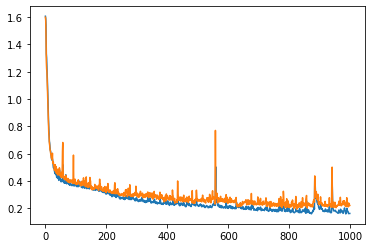

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])